# Benchmark GRN inference

## Library imports

In [1]:
import pandas as pd
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

from rgv_tools import DATA_DIR, FIG_DIR
from rgv_tools.core import METHOD_PALETTE

## Constants

In [2]:
DATASET = "mHSPC"

In [3]:
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "results").mkdir(parents=True, exist_ok=True)

SAVE_FIGURE = True
if SAVE_FIGURE:
    (FIG_DIR / DATASET).mkdir(parents=True, exist_ok=True)

## Data loading

In [4]:
tfv_score = pd.read_csv(DATA_DIR / DATASET / "results" / "GRN_benchmark_tfv.csv")
rgv_score = pd.read_csv(DATA_DIR / DATASET / "results" / "GRN_benchmark_rgv.csv")
grn_score = pd.read_csv(DATA_DIR / DATASET / "results" / "GRN_benchmark.csv")

In [5]:
df = pd.concat([tfv_score, rgv_score, grn_score], ignore_index=True)

## Plot the benchmark

In [6]:
df

,Unnamed: 0,EPR,AUC,Method
0,0,1.116878,0.639869,tfvelo
1,0,1.138696,0.603134,regvelo
2,1,1.145427,0.600968,regvelo
3,2,1.124305,0.594723,regvelo
4,0,1.108522,0.566040,Corr
5,1,1.014753,0.533928,GRNBoost2
6,2,1.196337,0.557187,CellOracle


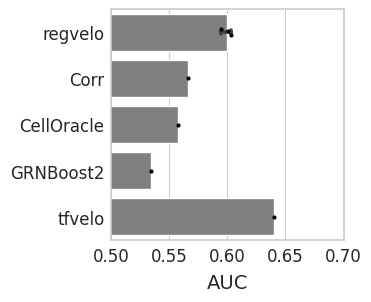

In [7]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3), sharey=True)
    # Plot the second Seaborn plot on the first subplot
    sns.barplot(y='Method', x='AUC',data=df, capsize=0.1,color = "grey",order = ["regvelo","Corr","CellOracle","GRNBoost2","tfvelo"],ax = ax)
    sns.stripplot(
        y='Method', x='AUC', data=df, 
        order=["regvelo","Corr","CellOracle","GRNBoost2","tfvelo"], 
        color='black', size=3, jitter=True, ax=ax
    )
    ax.set_xlabel('AUC',fontsize = 14)
    ax.set_ylabel('')
    plt.xlim(0.5, 0.7)
    plt.show()
    
    if SAVE_FIGURE:
        fig.savefig(FIG_DIR / DATASET / "AUC.svg", format="svg", transparent=True, bbox_inches="tight")

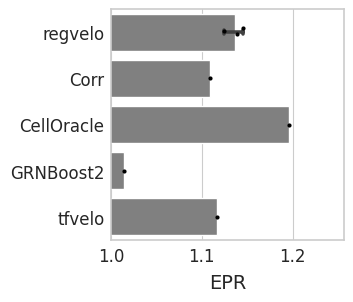

In [8]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(3, 3), sharey=True)
    # Plot the second Seaborn plot on the first subplot
    sns.barplot(y='Method', x='EPR',data=df, capsize=0.1,color = "grey",order = ["regvelo","Corr","CellOracle","GRNBoost2","tfvelo"],ax = ax)
    sns.stripplot(
        y='Method', x='EPR', data=df, 
        order=["regvelo","Corr","CellOracle","GRNBoost2","tfvelo"], 
        color='black', size=3, jitter=True, ax=ax
    )
    ax.set_xlabel('EPR',fontsize = 14)
    ax.set_ylabel('')
    plt.xlim(1.0,)
    plt.show()
    
    if SAVE_FIGURE:
        fig.savefig(FIG_DIR / DATASET / "EPR.svg", format="svg", transparent=True, bbox_inches="tight")